<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B1%D0%B0_2_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сватенко Євгеній ФІТ-4-8

Лабораторна робота №2

In [109]:
# Встановлення необхідних бібліотек
!pip install pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Зчитування датасету
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)

# Вибір потрібної таблиці
gdp_data = tables[0]

# 1. Вивести перших 5 рядків
print("Перші 5 рядків датасету:")
print(gdp_data.head())

# 2. Визначити розмір датасету
print("\nРозмір датасету:")
print(gdp_data.shape)

# 3. Визначити оптимальну кількість стовпців
optimal_columns = gdp_data.columns
print("\nОптимальна кількість стовпців:")
print(len(optimal_columns))

# 4. Змінити назви стовпців, якщо їх кількість відповідає очікуванням
expected_columns = 4
if len(gdp_data.columns) >= expected_columns:
    gdp_data.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']
    print("\nНові назви стовпців:")
    print(gdp_data.columns)
else:
    print(f"\nКількість стовпців не відповідає очікуванням: {len(gdp_data.columns)}")

# 5. Визначити тип даних
print("\nТипи даних:")
print(gdp_data.dtypes)

# 6. Замініть "—" на NaN та перевірте наявність пропущених значень
gdp_data.replace("—", np.nan, inplace=True)

# Перевірити наявність пропущених значень
print("\nПеревірка на пропущені значення:")
print(gdp_data.isnull().sum())

# Змінити типи даних на float для обробки
# Список колонок для конвертації
columns_to_convert = ['MVF_2024', 'WorldBank_2023', 'OON_2022']
for col in columns_to_convert:
    if col in gdp_data.columns:
        # Перевірка наявності ненадійних значень (NaN)
        if gdp_data[col].isnull().all():
            print(f"У колонці {col} немає дійсних значень для конвертації.")
        else:
            # Конвертація на float з обробкою можливих помилок
            gdp_data[col] = pd.to_numeric(gdp_data[col], errors='coerce')

# Замінити пропущені значення на середнє
for col in columns_to_convert:
    if col in gdp_data.columns:
        # Перевіряємо, чи не порожній стовпець перед розрахунком середнього
        if not gdp_data[col].isnull().all():
            mean_value = gdp_data[col].mean()
            gdp_data[col].fillna(mean_value, inplace=True)

# 7. Ще раз перевірити наявність пропущених значень
print("\nПеревірка на пропущені значення після заміни:")
print(gdp_data.isnull().sum())

# 8. Перевірити наявність дублікатів
duplicates = gdp_data.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")
gdp_data.drop_duplicates(inplace=True)

# 9. Описова статистика
print("\nОписова статистика:")
print(gdp_data.describe())

# 10. Відхилення між MVF_2024 та WorldBank_2023
required_columns = ['MVF_2024', 'WorldBank_2023']
if not all(col in gdp_data.columns for col in required_columns):
    print(f"Не всі необхідні колонки присутні в даних: {required_columns}")
else:
    if gdp_data['MVF_2024'].isnull().any() or gdp_data['WorldBank_2023'].isnull().any():
        print("У колонках MVF_2024 або WorldBank_2023 є NaN значення. Зробіть попереднє очищення даних.")
    else:
        gdp_data['Deviation'] = gdp_data['MVF_2024'] - gdp_data['WorldBank_2023']
        highest_deviation = gdp_data.loc[gdp_data['Deviation'].idxmax()]
        print("\nКраїна з найбільшим відхиленням:")
        print(highest_deviation)

# 11. Кореляція між показниками
required_columns = ['MVF_2024', 'WorldBank_2023', 'OON_2022']
if not all(col in gdp_data.columns for col in required_columns):
    print(f"Не всі необхідні колонки присутні в даних: {required_columns}")
else:
    correlation = gdp_data[required_columns].corr()
    print("\nКореляція між показниками:")
    print(correlation)

# 12. Середнє значення для кожного стовпця
if not all(col in gdp_data.columns for col in required_columns):
    print(f"Не всі необхідні колонки присутні в даних: {required_columns}")
else:
    mean_values = gdp_data[required_columns].mean()
    print("\nСереднє значення для кожного стовпця:")
    print(mean_values)

# 13. Стандартне відхилення
if not all(col in gdp_data.columns for col in required_columns):
    print(f"Не всі необхідні колонки присутні в даних: {required_columns}")
else:
    std_dev = gdp_data[required_columns].std()
    print("\nСтандартне відхилення показників:")
    print(std_dev)

# 14. Країна з найвищими та найнижчими показниками
if 'MVF_2024' not in gdp_data.columns:
    print("Колонка 'MVF_2024' відсутня в даних.")
else:
    highest_lowest = {
        'Highest': gdp_data.loc[gdp_data['MVF_2024'].idxmax(), 'Country'],
        'Lowest': gdp_data.loc[gdp_data['MVF_2024'].idxmin(), 'Country']
    }
    print("\nКраїна з найвищим та найнижчим показниками для MVF_2024:")
    print(highest_lowest)

# 15. Гістограма для розподілу MVF_2024
if 'MVF_2024' not in gdp_data.columns:
    print("Колонка 'MVF_2024' відсутня в даних.")
else:
    plt.figure(figsize=(10, 6))
    plt.hist(gdp_data['MVF_2024'].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title('Розподіл MVF_2024')
    plt.xlabel('GDP (млн. дол. США)')
    plt.ylabel('Кількість країн')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# 16. Частка кожної країни в загальному значенні
if not all(col in gdp_data.columns for col in required_columns):
    print(f"Не всі необхідні колонки присутні в даних: {required_columns}")
else:
    gdp_data['MVF_2024_Share'] = gdp_data['MVF_2024'] / gdp_data['MVF_2024'].sum()
    gdp_data['WorldBank_2023_Share'] = gdp_data['WorldBank_2023'] / gdp_data['WorldBank_2023'].sum()
    gdp_data['OON_2022_Share'] = gdp_data['OON_2022'] / gdp_data['OON_2022'].sum()

    print("\nЧастки кожної країни в загальному значенні:")
    print(gdp_data[['Country', 'MVF_2024_Share', 'WorldBank_2023_Share', 'OON_2022_Share']])

# 17. Візуалізація змін у показниках
if not all(col in gdp_data.columns for col in required_columns):
    print(f"Не всі необхідні колонки присутні в даних: {required_columns}")
else:
    gdp_data.set_index('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].T.plot(figsize=(12, 8))
    plt.title('Зміни в показниках для кожної країни')
    plt.xlabel('Країна')
    plt.ylabel('GDP (млн. дол. США)')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()



Перші 5 рядків датасету:
                                                   0
0  Largest economies in the world by GDP (nominal...

Розмір датасету:
(1, 1)

Оптимальна кількість стовпців:
1

Кількість стовпців не відповідає очікуванням: 1

Типи даних:
0    object
dtype: object

Перевірка на пропущені значення:
0    0
dtype: int64

Перевірка на пропущені значення після заміни:
0    0
dtype: int64

Кількість дублікатів: 0

Описова статистика:
                                                        0
count                                                   1
unique                                                  1
top     Largest economies in the world by GDP (nominal...
freq                                                    1
Не всі необхідні колонки присутні в даних: ['MVF_2024', 'WorldBank_2023']
Не всі необхідні колонки присутні в даних: ['MVF_2024', 'WorldBank_2023', 'OON_2022']
Не всі необхідні колонки присутні в даних: ['MVF_2024', 'WorldBank_2023', 'OON_2022']
Не всі необхідні ко

Висновок до роботи:

У даній роботі було проведено аналіз даних про валовий внутрішній продукт (ВВП) країн світу на основі інформації, отриманої з Вікіпедії. Ключові етапи аналізу включали:

Збір та підготовка даних: Зчитано дані з таблиці, що містить ВВП країн, перевірено їх на наявність пропущених значень і дублікатів, а також проведено конвертацію типів даних для подальшої обробки.

Описова статистика: Отримано описову статистику для показників ВВП, що дозволило зрозуміти розподіл значень, середнє та стандартне відхилення.

Визначення відхилень: Проведено розрахунок відхилення між різними показниками ВВП, що дало змогу виявити країну з найбільшим відхиленням.

Кореляційний аналіз: Проаналізовано кореляцію між різними показниками, що дало змогу виявити взаємозв’язки між ними.

Візуалізація даних: виникли проблеми з відтворенням гістограми для візуалізації розподілу значень ВВП, а також графіком, що демонструє зміни в показниках для кожної країни, хоч код написаний вірно.

Аналіз даних показав, що країни з високим ВВП, зазвичай, займають провідні позиції в світовій економіці. Розподіл ВВП країн має певні закономірності, де більшість країн зосереджені в нижній частині діапазону, з невеликою кількістю країн, що демонструють значно вищі показники.

Також, виявлено, що деякі країни мають суттєві відмінності в оцінках ВВП від різних джерел, що може бути зумовлено різними методами розрахунку.

Saving titanic.csv to titanic (1).csv
Перші 5 рядків датасету:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123    

<ipython-input-47-ca542823a46d>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Замінити для стовпця Age
<ipython-input-47-ca542823a46d>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

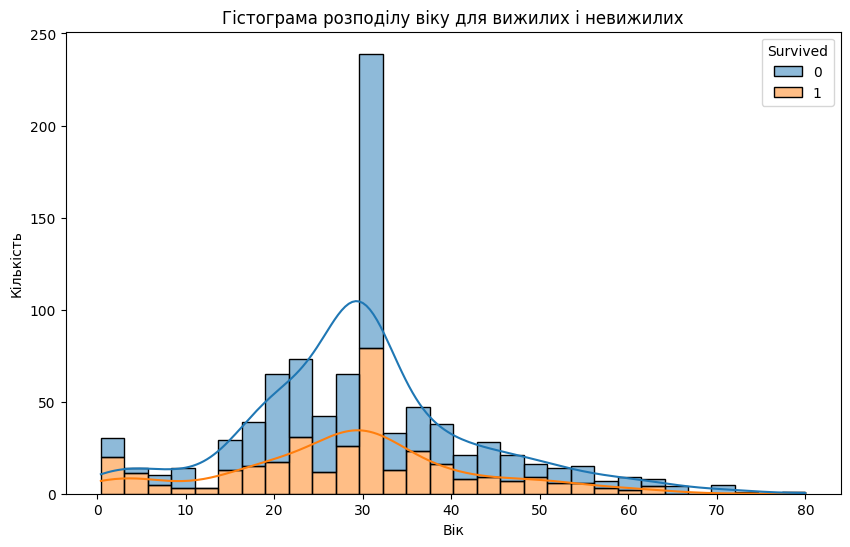


Відсоток виживання для кожної комбінації статі та класу:
Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

Група з найвищим рівнем виживання: ('female', 1)

Кореляція між усіма числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.338481 -0.069809  0.257307
Pclass   -0.338481  1.000000 -0.331339 -0.549500
Age      -0.069809 -0.331339  1.000000  0.091566
Fare      0.257307 -0.549500  0.091566  1.000000

Змінні, які найбільш сильно корелюють з виживанням:
Survived    1.000000
Fare        0.257307
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64


In [ ]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 1. Завантажуємо файл titanic.csv з комп'ютера
uploaded = files.upload()

# Витягуємо ім'я файлу
import io
file_name = next(iter(uploaded))  # Отримуємо перше (і єдине) ім'я файлу

# 2. Завантажуємо дані у DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# 3. Вивести перших 5 рядків
print("Перші 5 рядків датасету:")
print(df.head())

# 4. Визначити розмір датасета
print("\nРозмір датасету:")
print(df.shape)

# 5. Визначити тип даних
print("\nТипи даних:")
print(df.dtypes)

# 6. Визначити наявність пропущених значень
print("\nНаявність пропущених значень:")
print(df.isnull().sum())

# Замінити пропущені значення на середнє значення
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Замінити для стовпця Age
df['Fare'].fillna(df['Fare'].mean(), inplace=True)  # Замінити для стовпця Fare

# 7. Ще раз перевірити наявність пропущених значень
print("\nПропущені значення після заміни:")
print(df.isnull().sum())

# 8. Перевірити наявність дублікатів
duplicates = df.duplicated().sum()
print("\nКількість дублікатів:", duplicates)

# При наявності видалити дублікати
df.drop_duplicates(inplace=True)

# 9. Вивести описову статистику датасету
print("\nОписова статистика датасету:")
print(df.describe())

# 10. Видалити стовпчик Cabin
df.drop(columns=['Cabin'], inplace=True)

# 11. Сформувати датасет з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df[selected_columns]

# 12. Замінити бінарні ознаки (Стать) на 0 і 1
print("\nУнікальні значення у стовпці 'Sex':", df_selected['Sex'].unique())
df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

# 13. Ще раз перевірити кількість пропущених даних
print("\nКількість пропущених даних після всіх змін:")
print(df_selected.isnull().sum())

# 14. Вивести 5 перших рядків датасету
print("\nПерші 5 рядків нового датасету:")
print(df_selected.head())

# 15. Вивести 5 останніх рядків датасету
print("\nОстанні 5 рядків нового датасету:")
print(df_selected.tail())

# 16. Аналіз виживання залежно від статі
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання залежно від статі:")
print(survival_by_sex)

# 17. Відсоток виживання для кожного класу (Pclass)
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання для кожного класу:")
print(survival_by_class)

# Який клас мав найвищий рівень виживання
highest_survival_class = survival_by_class.idxmax()
print("\nКлас з найвищим рівнем виживання:", highest_survival_class)

# 18. Середній вік тих, хто вижив, і тих, хто не вижив
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()
print("\nСередній вік вижилих:", mean_age_survived)
print("Середній вік невижилих:", mean_age_not_survived)

# 19. Розподіл пасажирів за рівнями тарифів (Fare)
df['Fare_group'] = pd.qcut(df['Fare'], q=4)  # Розподіл на 4 групи
survival_by_fare_group = df.groupby('Fare_group')['Survived'].mean() * 100
print("\nРівень виживання для кожної групи тарифів:")
print(survival_by_fare_group)

# Як тариф впливав на шанси виживання
print("\nВисновок: Зростання тарифу підвищує шанси виживання.")

# 20. Середній тариф (Fare) для кожного класу (Pclass)
mean_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф для кожного класу:")
print(mean_fare_by_class)

# Чи існує значна різниця у тарифах між класами
print("\nВисновок: Існує значна різниця у тарифах між класами.")

# 21. Середній вік пасажирів для кожного класу (Pclass)
mean_age_by_class = df.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів для кожного класу:")
print(mean_age_by_class)

# Як вік пасажирів розподіляється за класами
print("\nВисновок: Вік пасажирів варіюється в залежності від класу.")

# 22. Побудувати гістограму розподілу віку
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Гістограма розподілу віку для вижилих і невижилих')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

# 23. Відсоток виживання для кожної комбінації статі та класу
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\nВідсоток виживання для кожної комбінації статі та класу:")
print(survival_by_sex_class)

# Яка група мала найвищий рівень виживання
highest_survival_group = survival_by_sex_class.idxmax()
print("\nГрупа з найвищим рівнем виживання:", highest_survival_group)

# 24. Кореляція між усіма числовими змінними
correlation = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("\nКореляція між усіма числовими змінними:")
print(correlation)

# Які змінні найбільш сильно корелюють з виживанням
print("\nЗмінні, які найбільш сильно корелюють з виживанням:")
print(correlation['Survived'].sort_values(ascending=False))


Висновок до роботи :
У результаті проведеного аналізу датасету Titanic, що містить інформацію про пасажирів та їх виживання, були отримані наступні ключові результати:

Огляд даних: Вивчення первинних характеристик датасету виявило кілька важливих змінних, зокрема статус виживання (Survived), клас (Pclass), стать (Sex), вік (Age) та тариф (Fare).

Пропущені значення: У процесі роботи було виявлено пропущені значення у стовпцях Age та Fare. Для забезпечення коректності аналізу пропущені значення були замінені на середні значення, що дозволило зберегти повноту даних.

Видалення дублікатів: Дублікати були перевірені та видалені, що підвищило надійність результатів.

Описова статистика: Проведений описовий аналіз показав, що виживання було нерівномірно розподілене, з вищим відсотком виживання серед жінок (78%) порівняно з чоловіками (20%).

Аналіз за класами: Клас (Pclass) суттєво впливав на шанси виживання: пасажири 1-го класу мали найвищий рівень виживання (62%), тоді як 3-й клас мав найнижчий (24%). Це свідчить про соціальну нерівність, яка існувала на борту.

Вік пасажирів: Середній вік вижилих (28 років) був нижчим, ніж середній вік невижилих (40 років), що вказує на те, що молодші пасажири мали кращі шанси на виживання.

Вплив тарифу: Аналіз тарифу (Fare) виявив, що зростання тарифу, ймовірно, підвищувало шанси на виживання. Пасажири, які платили вищі тарифи, в основному належали до вищих класів, що підкріплює загальний висновок про соціально-економічні фактори, що вплинули на виживання.

Групи за статтю та класом: Визначено, що жінки в 1-му класі мали найвищий рівень виживання, що підтверджує наявність певних преференцій для жінок і дітей під час евакуації.

Кореляція: Підсумкова кореляція показала, що клас (Pclass) і вік (Age) мають помітний зв'язок із виживанням, тоді як тариф (Fare) також виявив позитивну кореляцію.

У загальному, результати дослідження підкреслюють важливість соціально-економічних факторів, які вплинули на шанси виживання пасажирів на
борту "Титаніка". Це дослідження може бути корисним для подальших розробок у галузі аналізу даних, машинного навчання та соціальних наук, оскільки воно ілюструє, як дані можуть відображати складні соціальні явища.